#### ● Dataset Link: Heart Disease UCI on Kaggle: https://www.kaggle.com/datasets/mragpavank/heart-diseaseuci
Dataset Overview:
This dataset contains information on patients' medical attributes, such as age, sex, blood pressure, cholesterol, and other health-related factors. The goal is to predict whether a patient has heart disease based on these attributes.

### 1. Dataset Overview

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/Hoi Yee/Downloads/Heart_Disease/heart.csv')


df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Data Preprocessing

In [3]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
# Encode Categorical Data using one-hot encoding

from sklearn.preprocessing import OneHotEncoder

# One-hot encode selected categorical features
categorical_features = ['cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [5]:
# Feature Scaling to standardize numeric features: age, trestbps, chol, thalach, oldpeak
from sklearn.preprocessing import StandardScaler

# Define numeric columns to scale
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


### Step 3: Exploratory Data Analysis (EDA)

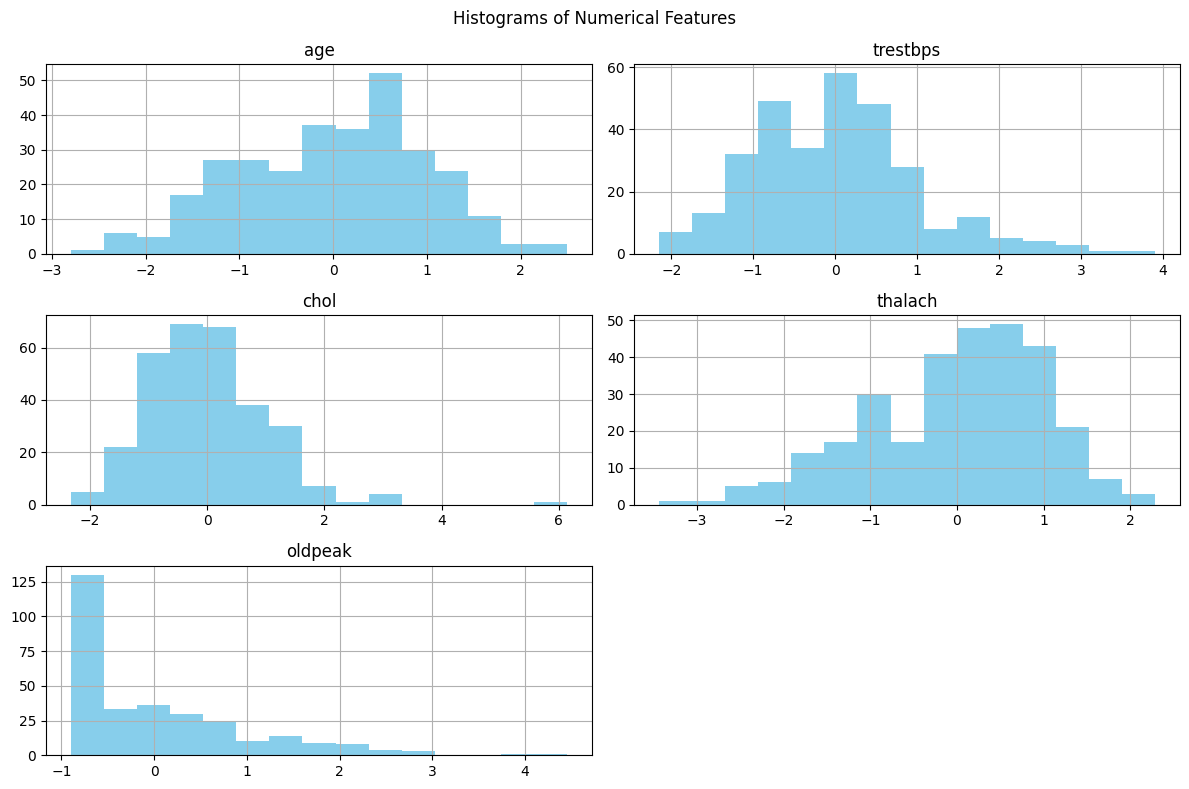

In [6]:
# visualize distributions, correlations, and relationships
# Histograms for Numerical Variables

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms
df[numerical_cols].hist(figsize=(12, 8), bins=15, color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()


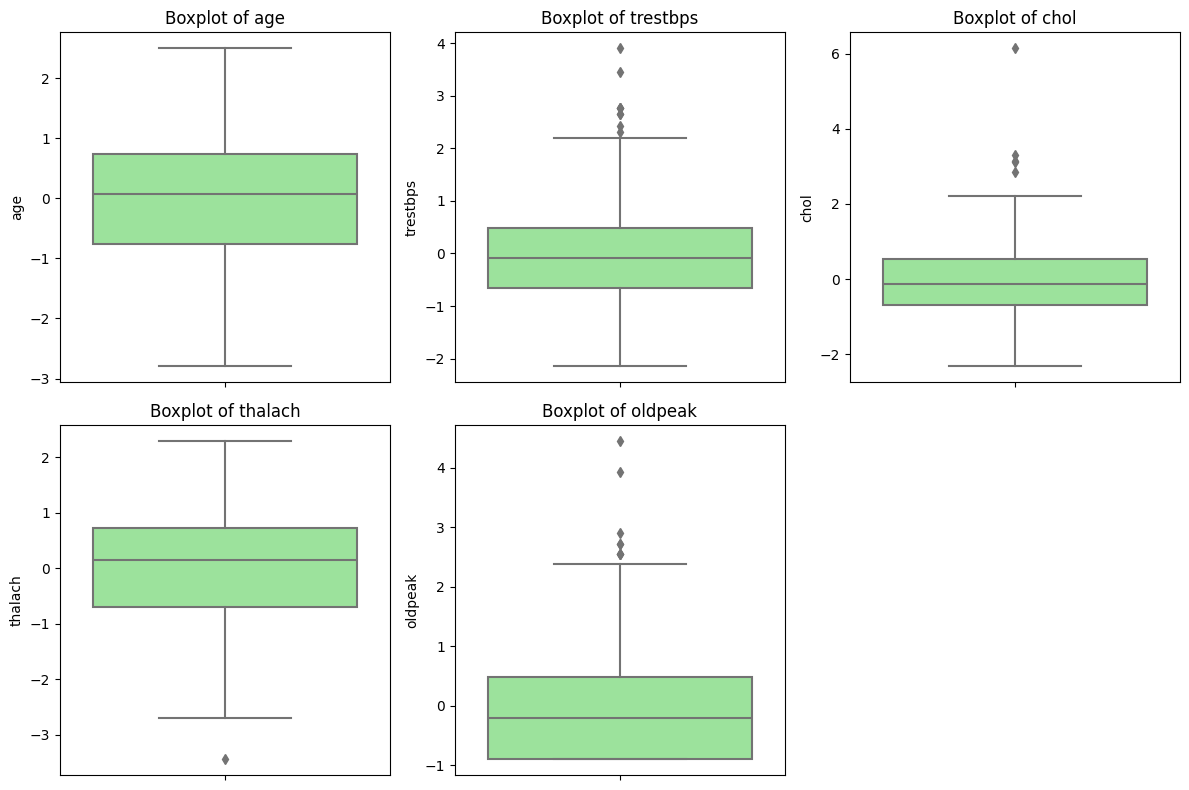

In [7]:
# Boxplots to Detect Outliers

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


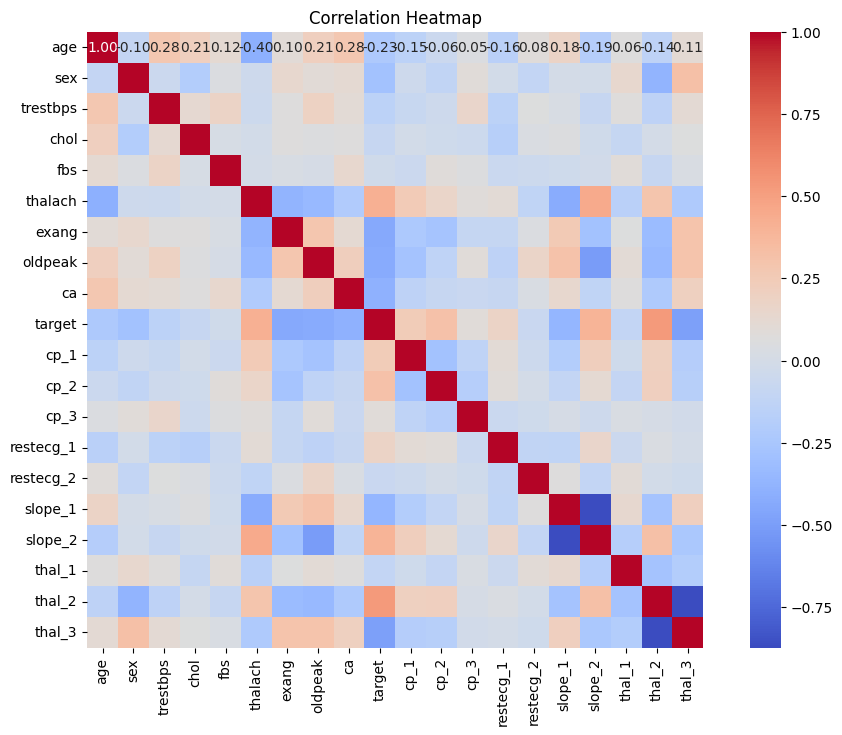

In [8]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Statistical Summary: mean, median, std and check the distribution of target labels
# Summary stats
summary_stats = df[numerical_cols].describe()
print(summary_stats)


                age      trestbps          chol       thalach       oldpeak
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02
mean   4.690051e-17 -7.035077e-16 -1.113887e-16 -6.800574e-16  2.345026e-17
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00
min   -2.797624e+00 -2.148802e+00 -2.324160e+00 -3.439267e+00 -8.968617e-01
25%   -7.572802e-01 -6.638668e-01 -6.814943e-01 -7.061105e-01 -8.968617e-01
50%    6.988599e-02 -9.273778e-02 -1.210553e-01  1.466343e-01 -2.067053e-01
75%    7.316189e-01  4.783913e-01  5.456738e-01  7.151309e-01  4.834512e-01
max    2.496240e+00  3.905165e+00  6.140401e+00  2.289429e+00  4.451851e+00


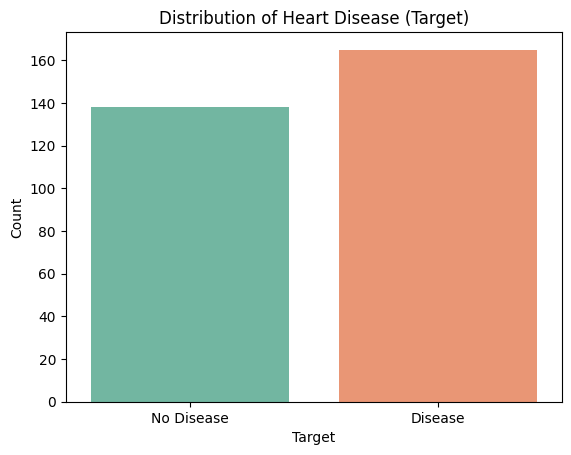

target
1    165
0    138
Name: count, dtype: int64
target
1    54.455446
0    45.544554
Name: proportion, dtype: float64


In [10]:
# distribution of target labels
# Target value counts
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribution of Heart Disease (Target)')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

# Print counts and percentages
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True) * 100)


### Step 4: Feature Engineering

In [11]:
# Create New Features to improve Age ranges (e.g., 20-30), Age multiplied by cholesterol level
# Create age ranges (bins)

df['age_group'] = pd.cut(df['age'],
                         bins=[20, 30, 40, 50, 60, 70, 80],
                         labels=['20s', '30s', '40s', '50s', '60s', '70s'])

# one-hot encode age_group for modeling
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)


In [12]:
# Age multiplied by cholesterol level
df['age_chol'] = df['age'] * df['chol']
df['age_chol'].head()

0   -0.244080
1   -0.138285
2    1.204052
3   -0.035739
4    0.604760
Name: age_chol, dtype: float64

In [13]:
# Feature Selection: Use RandomForestClassifier to select the most important features
# correlation analysis - Correlation with Target
corr_target = df.corr()['target'].sort_values(ascending=False)
print("Correlation with Target:\n", corr_target)


Correlation with Target:
 target           1.000000
thal_2           0.527334
thalach          0.421741
slope_2          0.394066
cp_2             0.316742
cp_1             0.245879
restecg_1        0.175322
cp_3             0.086957
age_chol         0.084928
fbs             -0.028046
restecg_2       -0.068410
chol            -0.085239
thal_1          -0.106589
trestbps        -0.144931
age             -0.225439
sex             -0.280937
slope_1         -0.362053
ca              -0.391724
oldpeak         -0.430696
exang           -0.436757
thal_3          -0.486112
age_group_30s         NaN
age_group_40s         NaN
age_group_50s         NaN
age_group_60s         NaN
age_group_70s         NaN
Name: target, dtype: float64


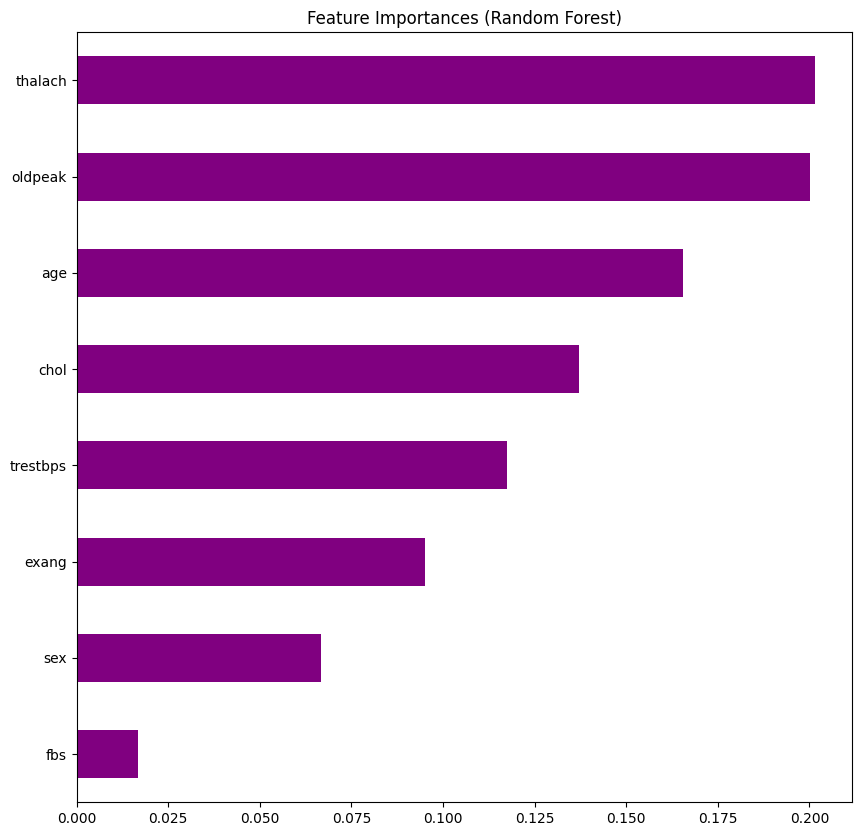

In [14]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_features = [
    'age', 'sex', 'trestbps', 'chol', 'fbs',
    'thalach', 'exang', 'oldpeak',  # ← examples from your Streamlit UI
    # Add the rest of the 11 features you’re using
]

X = df[selected_features]
y = df['target']

# Split and train as usual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 10), color='purple')
plt.title("Feature Importances (Random Forest)")
plt.show()


### 5. Model Development

In [15]:
# Split Data
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
# Model Selection and Training - classification algorithms to predict the target variable

In [17]:
# Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
SVM trained.


### Step 6: Model Evaluation

In [18]:
# Evaluation Metrics: Accuracy, Precision, Recall, and F1-Score, ROC Curve and AUC score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Needed for ROC-AUC
    
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.7692307692307693
Precision: 0.7735849056603774
Recall: 0.82
F1 Score: 0.7961165048543689
ROC-AUC: 0.8697560975609756
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



--- Decision Tree ---
Accuracy: 0.7252747252747253
Precision: 0.7272727272727273
Recall: 0.8
F1 Score: 0.7619047619047619
ROC-AUC: 0.7170731707317074
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.68        41
           1       0.73      0.80      0.76        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72 

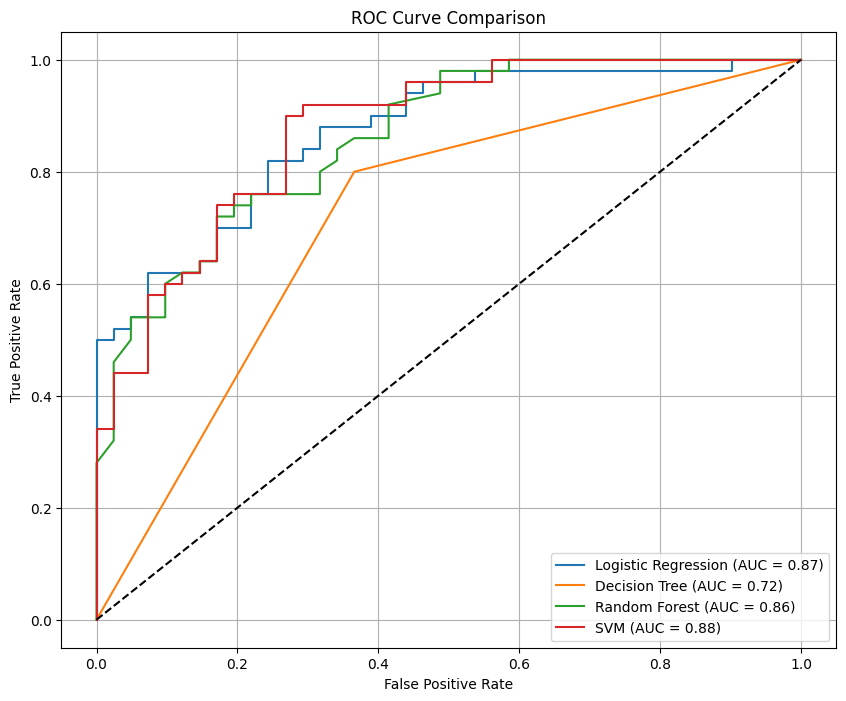

In [19]:
# ROC Curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


In [20]:
# Cross-Validation - Use k-fold cross-validation to ensure the model generalizes well to unseen data.
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score

print("Cross-Validation Scores (5-fold):")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f} | Std = {cv_scores.std():.4f}")


Cross-Validation Scores (5-fold):
Logistic Regression: Mean Accuracy = 0.8282 | Std = 0.0480
Decision Tree: Mean Accuracy = 0.7128 | Std = 0.0403
Random Forest: Mean Accuracy = 0.8184 | Std = 0.0351
SVM: Mean Accuracy = 0.8052 | Std = 0.0411


### Step 7: Hyperparameter Tuning

In [21]:
# Use GridSearchCV to fine-tune: Decision Tree, Random Forest , SVM
from sklearn.model_selection import GridSearchCV


In [22]:
# Tune: Decision Tree
# Define parameter grid
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Best model
best_dt = dt_grid.best_estimator_
print("Best Decision Tree Parameters:", dt_grid.best_params_)


Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [23]:
# Tune: Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)


Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
# Tune: SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

best_svm = svm_grid.best_estimator_
print("Best SVM Parameters:", svm_grid.best_params_)


Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


### Step 8: Model Comparison

In [25]:
# Choose the best-performing model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

# Evaluate all models
model_results = [
    evaluate_model('Logistic Regression', models['Logistic Regression']),
    evaluate_model('Decision Tree (Tuned)', best_dt),
    evaluate_model('Random Forest (Tuned)', best_rf),
    evaluate_model('SVM (Tuned)', best_svm)
]

# Create comparison DataFrame
import pandas as pd
results_df = pd.DataFrame(model_results)
results_df.set_index('Model', inplace=True)
print(results_df.sort_values(by='ROC AUC', ascending=False))


                       Accuracy  Precision  Recall  F1 Score   ROC AUC
Model                                                                 
Logistic Regression    0.769231   0.773585    0.82  0.796117  0.869756
Random Forest (Tuned)  0.780220   0.777778    0.84  0.807692  0.869756
SVM (Tuned)            0.780220   0.777778    0.84  0.807692  0.868780
Decision Tree (Tuned)  0.725275   0.719298    0.82  0.766355  0.758293


In [26]:
# Discuss why certain models performed better or worse than others.

### Choose the model with highest F1 Score and AUC, where false positives/negatives are costly.
- Random Forest often performs best due to its ensemble nature, 
- SVM might also perform well, especially with tuning.
- Logistic Regression may underperform if relationships are non-linear.
- Decision Tree is easy to understand but prone to overfitting.

### 9: Model Deployment

In [27]:
# Save the model
import joblib
joblib.dump(rf, 'model.pkl')

['model.pkl']

In [28]:
print(X.columns.tolist())

['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'age_group_30s', 'age_group_40s', 'age_group_50s', 'age_group_60s', 'age_group_70s', 'age_chol']


In [30]:
model = joblib.load('model.pkl')
print(model.feature_names_in_)

['age' 'sex' 'trestbps' 'chol' 'fbs' 'thalach' 'exang' 'oldpeak']
